# ディープラーニングと数学の9章　ロジスティック回帰 多値分類

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

# 学習／評価データの分離
from sklearn.model_selection import train_test_split
# 精度計算
from sklearn.metrics import accuracy_score
# One Hoe Vector生成
from sklearn.preprocessing import OneHotEncoder


## データ読み込み、前処理

In [3]:
iris_row_df = pd.read_csv('dataset/iris.data')
iris_df = iris_row_df.assign(class_code = iris_row_df.iris_class.apply( lambda x: 0 if x == "Iris-setosa" else 1 if x == "Iris-versicolor" else 2 ) )

iris_df

,sepal_length,sepal_width,petal_length,petal_width,iris_class,class_code
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


Axes(0.125,0.11;0.775x0.77)


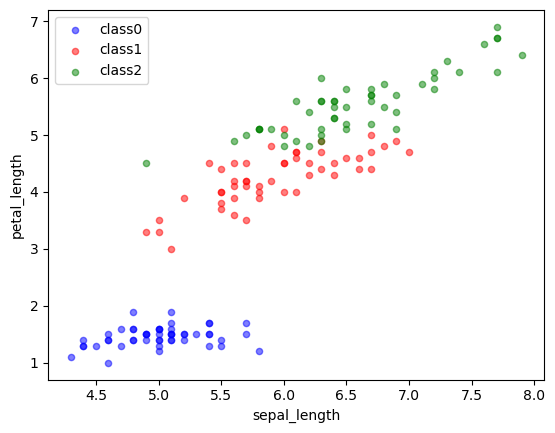

In [4]:
# 散布図に可視化
df_class0 = iris_df.query("class_code == 0")
df_class1 = iris_df.query("class_code == 1")
df_class2 = iris_df.query("class_code == 2")

ax = df_class0.plot.scatter(x="sepal_length", y="petal_length", c='b', alpha=0.5, label='class0')
ax = df_class1.plot.scatter(x="sepal_length", y="petal_length", c='r', alpha=0.5, label='class1',ax=ax)
ax = df_class2.plot.scatter(x="sepal_length", y="petal_length", c='g', alpha=0.5, label='class2',ax=ax)

print(ax)

In [5]:
# データ加工
# x行列の作成
x = iris_df.loc[:,["sepal_length","petal_length"]].to_numpy()
yt = iris_df.class_code.to_numpy()
M = x.shape[0]
ones = np.ones((M,1))
x = np.hstack([ones,x])

print(f'x => \n{x[:5,:]}')
print(f'yt => \n{yt[:5]}')


x => 
[[1.  5.1 1.4]
 [1.  4.9 1.4]
 [1.  4.7 1.3]
 [1.  4.6 1.5]
 [1.  5.  1.4]]
yt => 
[0 0 0 0 0]
train_test_split stratify=yt
yt[0] 	37
yt[1] 	38
yt[2] 	37


#### (参考)train_test_splitのstratify引数の挙動。端的には、グループ化してデータを分離できる。

```python
x_train, x_test, y_train, y_test = train_test_split(x, yt)
print(f'train_test_split stratify=none(default)')
print(f'yt[0] \t{(y_train == 0).sum()}')
print(f'yt[1] \t{(y_train == 1).sum()}')
print(f'yt[2] \t{(y_train == 2).sum()}')

x_train, x_test, y_train, y_test = train_test_split(x, yt, stratify=yt)
print(f'train_test_split stratify=yt')
print(f'yt[0] \t{(y_train == 0).sum()}')
print(f'yt[1] \t{(y_train == 1).sum()}')
print(f'yt[2] \t{(y_train == 2).sum()}')

train_test_split stratify=none(default)
yt[0] 	39
yt[1] 	38
yt[2] 	35
train_test_split stratify=yt
yt[0] 	37
yt[1] 	37
yt[2] 	38

```



### One Hoe Vectorの生成

In [6]:
# エンコーダーのインスタンス生成
ohe = OneHotEncoder(sparse_output=False, categories='auto')

# 1次元配列を1列複数行のベクトルに変換
yt_work = np.c_[yt]

yt_ohv = ohe.fit_transform(yt_work)


print(f'yt =>\n{yt[:5]}\n')
print(f'yt_work =>\n{yt_work[:5]}\n')
print(f'yt.T =>\n{yt.T[:5]}\n')

print(f'yt_ohv =>\n{yt_ohv}')


yt =>
[0 0 0 0 0]

yt_work =>
[[0]
 [0]
 [0]
 [0]
 [0]]

yt.T =>
[0 0 0 0 0]

yt_ohv =>
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]


In [86]:
#yt_all = np.c_[yt,yt_ohv]

#x_train, x_test, yt_all_train, yt_all_test = train_test_split(x, yt_all)

# 正解カラムとOneHoeVectorカラムの分離
#yt_train = yt_all_train[:,0]
#yt_train_ohv = yt_all_train[:,1:4]

#yt_test = yt_all_test[:,0]
#yt_test_ohv = yt_all_test[:,1:4]

x_train, x_test, yt_train, yt_test, yt_train_ohv, yt_test_ohv = train_test_split(x, yt, yt_ohv, test_size=0.4)


print(yt_train.shape)
print(yt_train_ohv.shape)

print(yt_test.shape)
print(yt_test_ohv.shape)

# TODO ここから。

(90,)
(90, 3)
(60,)
(60, 3)


In [129]:
# 学習フェーズ
D = x.shape[1]
W = np.ones((np.unique(yt).size,D))

# 学習関連関数定義

def init_W(x_train,yt_train_ohv):
    # xの次元数（ダミー含む）
    D = x_train.shape[1]
    # 正解のクラス数（=OneHotVectorの横軸数）
    N = yt_train_ohv.shape[1]
    # ゼロ埋めの行列を作成
    W = np.ones((D, N))
    return W

def softmax(u):
    u = u.T
    u_max = u.max(axis=0)
    u = u - u_max
    w = np.exp(u)
    return (w / w.sum(axis=0)).T

def pred(x, W):
    return softmax(x @ W)

def cross_entropy(yt, yp):
    return -  np.mean(np.sum(yt * np.log(yp),axis=1))

def classify(yp):
    return np.argmax(yp, axis=1)

def evaluate(x, yt, yt_ohv, W):
    # 試験データで予測を実施
    yp = pred(x, W)
    # 確率値行列から最も値の大きい要素index（0,1,2）の配列に変換。これによりypと直接比較可能となる。
    yp_classified = classify(yp)

    # 損失関数（交差エントロピー）計算
    loss = cross_entropy(yt_test_ohv, yp)
    # 精度計算
    score = accuracy_score(yt, yp_classified)

    return loss, score

def plot_loss_accuracy(history):
    plt.plot(history[:,0],history[:,1], linewidth=1)
    plt.xlabel("iter")
    plt.ylabel("loss")
    plt.title("iter vs loss")
    plt.show()
    plt.plot(history[:,0],history[:,2] , linewidth=1)
    plt.xlabel("iter")
    plt.ylabel("accuracy")
    plt.title("iter vs accuracy")
    plt.show()
    
def train(x, yt_ohv, W, x_test, yt_test, yt_test_ohv, history, alpha=00.1, iter=10000):
    before_W = W
    before_loss = 10
    for k in range(iter):
        # 行数の取得
        M = x.shape[0]
        # 予測
        yp = pred(x, W)
        # 誤差計算
        yd = yp - yt_ohv
        # 重みベクトルの再計算
        W = W - alpha * ( x.T @ yd ) / M
        loss, score = evaluate(x_test, yt_test, yt_test_ohv, W)
        if k % (iter/100) == 0:
            history = np.vstack( (history, np.array([k, loss, score])))
            print(f'epoch = {k}\tloss = {loss}\tscore = {score}')
        if debug == True:
            print(f'=== epoch = {k} =========================================')
            print(f'x[0:5,:] =\n{x[0:5,:]}')
            print(f'(x @ W)[0:5,:] = \n{(x @ W)[0:5,:]}')
            print(f'yp[0:5,:] = \n{yp[0:5,:]}')
            print(f'yt_ohv[0:5,:] = \n{yt_ohv[0:5,:]}')
            print(f'yd[0:5,:] = \n{yd[0:5,:]}')
            print(f'W = \n{W}')
            print()
        if loss > before_loss:
            print(f'収束　k={k},loss={loss}')
            W = before_W
            break
        before_loss = loss
        before_W = W
    return W, history
            


In [116]:
# 学習実施
alpha = 0.01
iter = 1000000
W = init_W(x_train, yt_train_ohv)

debug=False
history = np.zeros((0,3))
ret_w, history = train(x_train, yt_train_ohv, W, x_test, yt_test, yt_test_ohv, history, alpha=alpha, iter=iter)
print(ret_w)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 5)

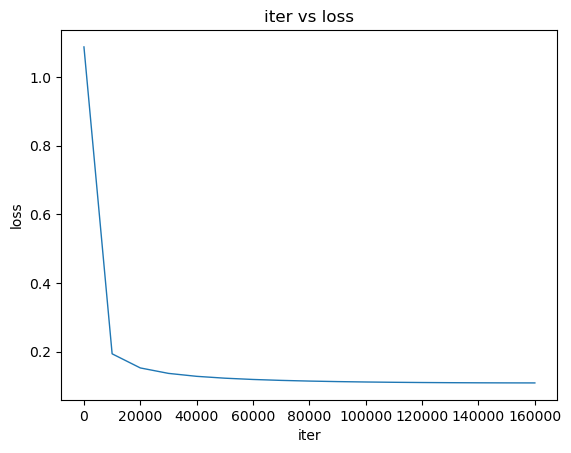

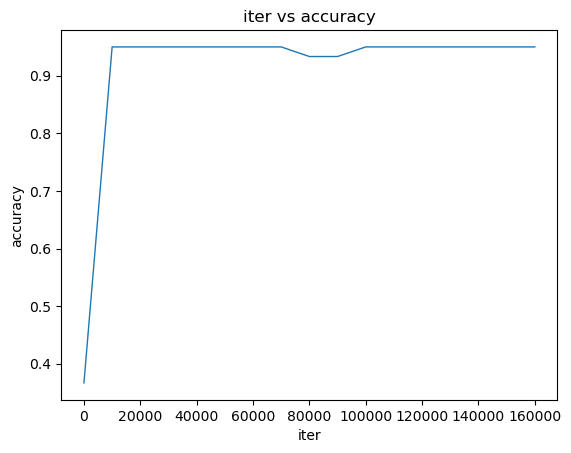

In [110]:
# 学習曲線／精度曲線
plot_loss_accuracy(history)

In [109]:
# 推論
answer = pred(x_test[0,:],ret_w)
np.set_printoptions(precision=3,suppress=True)
print(f'yt_test[0] : {yt_test[0]}')
print(f'yp(test[0]): {answer}')


yt_test[0] : 2
yp(test[0]): [0.    0.007 0.993]


# 次元を増やして学習

In [130]:
# 入力データxを4次元に増やす
x = iris_df.loc[:,["sepal_length","sepal_width","petal_length","petal_width"]].to_numpy()
yt = iris_df.class_code.to_numpy()
M = x.shape[0]
ones = np.ones((M,1))
x = np.hstack([ones,x])

# One Hot Vector生成
# エンコーダーのインスタンス生成
ohe = OneHotEncoder(sparse_output=False, categories='auto')
# 1次元配列を1列複数行のベクトルに変換
yt_work = np.c_[yt]
yt_ohv = ohe.fit_transform(yt_work)

# 学習データと試験データの分離
x_train, x_test, yt_train, yt_test, yt_train_ohv, yt_test_ohv = train_test_split(x, yt, yt_ohv, test_size=0.4)

# Wの生成
W = init_W(x_train, yt_train_ohv)


In [136]:
history = np.zeros((0,3))
alpha=0.01
iter=100000

ret_w, history = train(x_train, yt_train_ohv, W, x_test, yt_test, yt_test_ohv, history, alpha=alpha, iter=iter)

print(ret_w)

epoch = 0	loss = 1.0907144730635325	score = 0.2833333333333333
epoch = 1000	loss = 0.3984220417680645	score = 0.8666666666666667
epoch = 2000	loss = 0.30943794894665916	score = 0.9166666666666666
epoch = 3000	loss = 0.2627767578221414	score = 0.9333333333333333
epoch = 4000	loss = 0.23412607647827136	score = 0.95
epoch = 5000	loss = 0.2148748201458034	score = 0.95
epoch = 6000	loss = 0.20112848040001183	score = 0.95
epoch = 7000	loss = 0.19087729563754094	score = 0.95
epoch = 8000	loss = 0.18298268157229572	score = 0.95
epoch = 9000	loss = 0.1767523665108842	score = 0.95
epoch = 10000	loss = 0.1717414456421502	score = 0.95
epoch = 11000	loss = 0.16765094066227312	score = 0.95
epoch = 12000	loss = 0.1642724334323475	score = 0.95
epoch = 13000	loss = 0.16145611582647443	score = 0.95
epoch = 14000	loss = 0.159091475993271	score = 0.95
epoch = 15000	loss = 0.15709515536694715	score = 0.95
epoch = 16000	loss = 0.15540305256571602	score = 0.95
epoch = 17000	loss = 0.15396503678362175	score =

In [137]:
# 推論
answer = pred(x_test[0,:],ret_w)
np.set_printoptions(precision=3,suppress=True)
print(f'yt_test[0] : {yt_test[0]}')
print(f'yp(test[0]): {answer}')

yt_test[0] : 2
yp(test[0]): [0.    0.006 0.994]


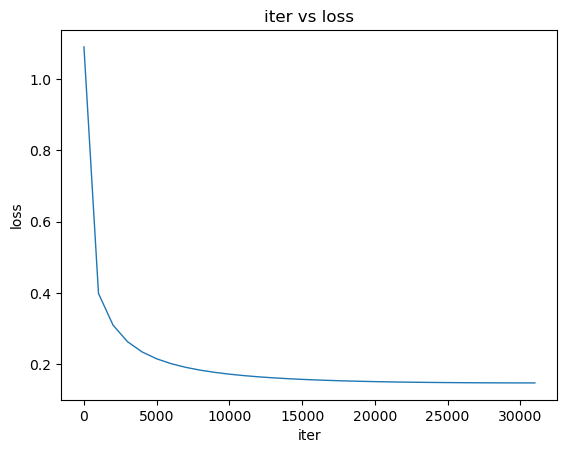

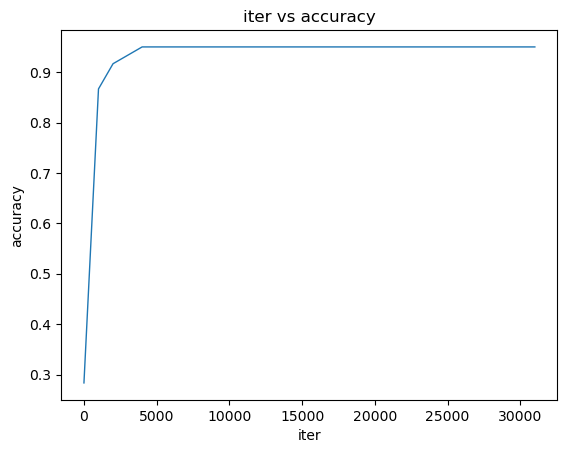

In [138]:
# 学習曲線／精度曲線
plot_loss_accuracy(history)